# Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

# Carregando os dados

In [2]:
Train_Data = pd.read_csv("Dados/heart.csv")
Train_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Descrição das colunas

1. __Age__ is the age of candidate.
2. __Sex__ has numeric values. 1 denotes male and 0 denotes female.
3. __Chest Pain__ pain has values between 0-3. The types of angina that are described in the research paper. The higher the number, the lesser are the odds of heart attack.
4. __Resting blood pressure__ is normal pressure with no exercise.
5. __Cholesterol__ means the blockage for blood supply in the blood vessels.
6. __Fasting Blood Pressure__ is blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning. 1 denotes > 120 mg/dl 
7. __Rest ECG (electrocardiographic) results__ means ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening. Values 0,1,2.
8. __The Maximum Heart Rate achieved__.
9. __Exercise induced angina__ is chest pain while exercising or doing any physical activity. 1 denotes presence and 0 denotes absence.
10. __Oldpeak__ = ST Depression induced by exercise relative to rest. ST Depression is the difference between value of ECG at rest and after exercise.
11. __ST Slope__ is the tangent to the depression value.
12. __The number of major blood vessels (0-3) supplying blood to heart blocked__.
13. __The Types of thalassemia__.
14. __Heart attack prediction__ where 1 denotes Heart attack occured and 0 where it din't take occur.

In [3]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Checar se as classes estão balanceadas

In [4]:
Train_Data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Checar se existem dados duplicados

In [5]:
print("Duplicated values: ", Train_Data.duplicated().sum())
duplicate = Train_Data[Train_Data.duplicated()]
duplicate

Duplicated values:  1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### Remover dados duplicados, deixando apenas a primeira ocorrência

In [6]:
Train_Data.drop_duplicates(keep='first',inplace=True) 
Train_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Checar se existem dados faltantes

In [7]:
print("Missing values: ", Train_Data.isnull().sum().sum())

Missing values:  0


# Checar se existem correlações entre os atributos e a saída

In [8]:
corr = Train_Data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


## Dividir atributos e saída

In [9]:
X=Train_Data[Train_Data.columns[Train_Data.columns!='target']]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
Y=Train_Data['target']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Dividir treinamento e teste

In [11]:
train_x, test_x, train_y,test_y=train_test_split(X,Y,random_state=0,test_size=0.2)
print(train_y.shape, test_y.shape)

(241,) (61,)


# Rede neural

### Model Accuracy:0.74
#### <center>Confusion Matrix:</center>

| Predita \ Verdadeira | Positiva | Negativa |
|--- | --- | --- |
Positiva | 25 | 2
Negativa | 14 | 20


# Rede Neural Convolucional

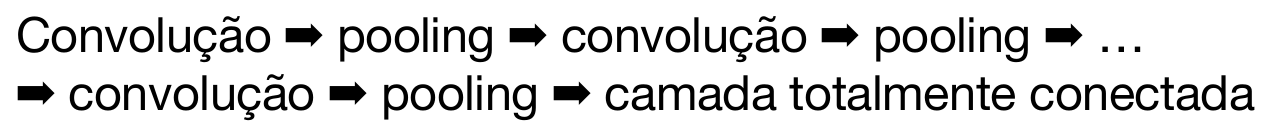

In [12]:
def CNN(train_x, train_y, test_x, test_y):
    
    tf.random.set_seed(123)
    print(train_x.shape)
    
    train_x=tf.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))
    print(train_x.shape)
    test_x=tf.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))
    
    #Parâmetros das camadas convolucionais:
        #(Número de filtros, Comprimento da janela de convolução, função de ativação)
     
    #Parâmetros das camadas MaxPooling:
        #(Tamanho da janela Max pooling, stride (especifica o quanto a janela de pool se move), padding (resulta em um preenchimento uniforme à esquerda / direita ou para cima / para baixo da entrada, de forma que a saída tenha a mesma dimensão de altura / largura da entrada))
    
    CNN_model = keras.Sequential([
    keras.layers.Conv1D(32, 7, activation='relu', input_shape=(train_x.shape[0],1)),
    keras.layers.MaxPooling1D(pool_size=2,strides=1, padding='same'),
    keras.layers.Conv1D(32, 7, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2,strides=1, padding='same'),
    keras.layers.Dense(1, activation='sigmoid')
    ])
    
    CNN_model.compile(
    loss='binary_crossentropy',
    optimizer='adamax',
    metrics=['accuracy']
    )
    
    train_history = CNN_model.fit(
    train_x, train_y,
    validation_data=(test_x, test_y),
    batch_size = 16,
    shuffle=True,
    epochs = 30
    )
    
    results = CNN_model.evaluate(test_x, test_y)
    
    return results

In [13]:
accuracy = CNN(train_x, train_y, test_x ,test_y)
print("Model Accuracy:" + str(accuracy[1]))

(241, 13)
(241, 13, 1)
Epoch 1/30
16/16 [==============================] - 4s 144ms/step - loss: 2.7093 - accuracy: 0.3954 - val_loss: 0.7915 - val_accuracy: 0.5082
Epoch 2/30
16/16 [==============================] - 0s 18ms/step - loss: 0.7758 - accuracy: 0.5805 - val_loss: 0.6254 - val_accuracy: 0.6557
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 0.6834 - accuracy: 0.6309 - val_loss: 0.6138 - val_accuracy: 0.7213
Epoch 4/30
16/16 [==============================] - 0s 7ms/step - loss: 0.6810 - accuracy: 0.6025 - val_loss: 0.5587 - val_accuracy: 0.7377
Epoch 5/30
16/16 [==============================] - 0s 7ms/step - loss: 0.6621 - accuracy: 0.6127 - val_loss: 0.5675 - val_accuracy: 0.7377
Epoch 6/30
16/16 [==============================] - 0s 8ms/step - loss: 0.6336 - accuracy: 0.6464 - val_loss: 0.5901 - val_accuracy: 0.6721
Epoch 7/30
16/16 [==============================] - 0s 7ms/step - loss: 0.6289 - accuracy: 0.5996 - val_loss: 0.6057 - val_accuracy: 0

# Normalizando os dados

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.fit_transform(test_x)

# Visualizando normalização

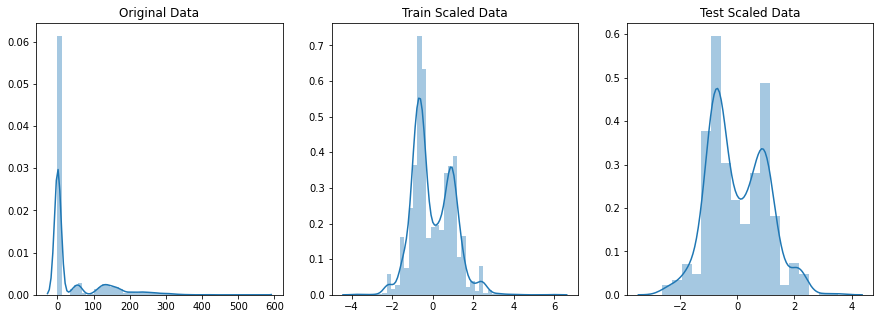

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
sns.distplot(np.concatenate(X.values), ax=ax[0]).set_title('Original Data')
sns.distplot(np.concatenate(X_train_scaled), ax=ax[1]).set_title('Train Scaled Data')
sns.distplot(np.concatenate(X_test_scaled), ax=ax[2]).set_title('Test Scaled Data')
plt.tight_layout
plt.show()

# Rede neural

### Model Accuracy:0.84
#### <center>Confusion Matrix:</center>

| Predita \ Verdadeira | Positiva | Negativa |
|--- | --- | --- |
Positiva | 22 | 5
Negativa | 5 | 29


# Rede Neural Convolucional

In [16]:
def CNN(train_x, train_y, test_x, test_y):
    
    tf.random.set_seed(123)
    print(train_x.shape)
    
    train_x=tf.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))
    print(train_x.shape)
    test_x=tf.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, min_delta=0.001)
    
    mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', save_best_only=True)
    
    CNN_model = keras.Sequential([
    keras.layers.Conv1D(32, 7, activation='relu', input_shape=(train_x.shape[0],1)),
    keras.layers.MaxPooling1D(pool_size=2,strides=1, padding='same'),
    keras.layers.Conv1D(32, 7, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2,strides=1, padding='same'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])
    
    CNN_model.compile(
    loss='binary_crossentropy',
    optimizer='adamax',
    metrics=['accuracy']
    )
    
    
    train_history = CNN_model.fit(
    train_x, train_y,
    validation_data=(test_x, test_y),
    batch_size = 16,
    shuffle=True,
    epochs = 300,
    callbacks=[callback, mc]
    )
    
    results = CNN_model.evaluate(test_x, test_y)
    
    return results

In [17]:
accuracy = CNN(X_train_scaled, train_y, X_test_scaled ,test_y)
print("Model Accuracy:" + str(accuracy[1]))

(241, 13)
(241, 13, 1)
Epoch 1/300
16/16 [==============================] - 1s 34ms/step - loss: 0.6951 - accuracy: 0.5533 - val_loss: 0.6325 - val_accuracy: 0.7377
Epoch 2/300
16/16 [==============================] - 0s 10ms/step - loss: 0.6247 - accuracy: 0.7637 - val_loss: 0.5876 - val_accuracy: 0.7869
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 0.5828 - accuracy: 0.8213 - val_loss: 0.5474 - val_accuracy: 0.7869
Epoch 4/300
16/16 [==============================] - 0s 7ms/step - loss: 0.5526 - accuracy: 0.7872 - val_loss: 0.5201 - val_accuracy: 0.8197
Epoch 5/300
16/16 [==============================] - 0s 7ms/step - loss: 0.5489 - accuracy: 0.7754 - val_loss: 0.4939 - val_accuracy: 0.8197
Epoch 6/300
16/16 [==============================] - 0s 7ms/step - loss: 0.5063 - accuracy: 0.7880 - val_loss: 0.4706 - val_accuracy: 0.8033
Epoch 7/300
16/16 [==============================] - 0s 8ms/step - loss: 0.4899 - accuracy: 0.7914 - val_loss: 0.4502 - val_accur

2/2 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.9016
Model Accuracy:0.9016393423080444
